### Exercise 1
    • A set of measurements have been performed on the concentration of a contaminant in tap water. The table reports a set of values (x), with the corresponding probabilities given by the two methods (p1 and p2).
    • Evaluate the expected values, E[X], and the variance, Var(X), for both methods.

A simple application of the given formula. Then the results are printed below.

In [ ]:
x <- c(15.58, 15.9, 16, 16.1, 16.2)
p_1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p_2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

Ex_1 <- sum(x * p_1)
Varx_1 <- sum(((x - Ex_1) ^ 2) * p_1)

Ex_2 <- sum(x * p_2)
Varx_2 <- sum(((x - Ex_2) ^ 2) * p_2)

cat(paste("E[x]_1 = ", sprintf(Ex_1, fmt = '%.3f'),"\nVar[x]_1 = ", sprintf(Varx_1, fmt = '%.3f'),"\nE[x]_2 = ", sprintf(Ex_2, fmt = '%.3f'),"\nVar[x]_2 = ", sprintf(Varx_2, fmt = '%.3f')))


E[x]_1 =  15.959 
Var[x]_1 =  0.034 
E[x]_2 =  15.962 
Var[x]_2 =  0.028

### Exercise 2
    • The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30.
    A) Simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram.
    B) What is the probability that a person will wait for less than 10 minutes?
    C) Evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R).
    D) What is the probability for waiting more than one hour before being received?

##### A)
The sample patients waiting times are created with the rexp function: the simulation has 50 patients and a rate of the exponential pdf of 1/30 (so an expected value of 30). Using ggplot2 the frequency distribution of waiting time is represented in a histogram, together with the expected theoretical distribution. The values of the expected mean value and of the experimental mean value are superimposed on the histogram.

In [ ]:
library(ggplot2)
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


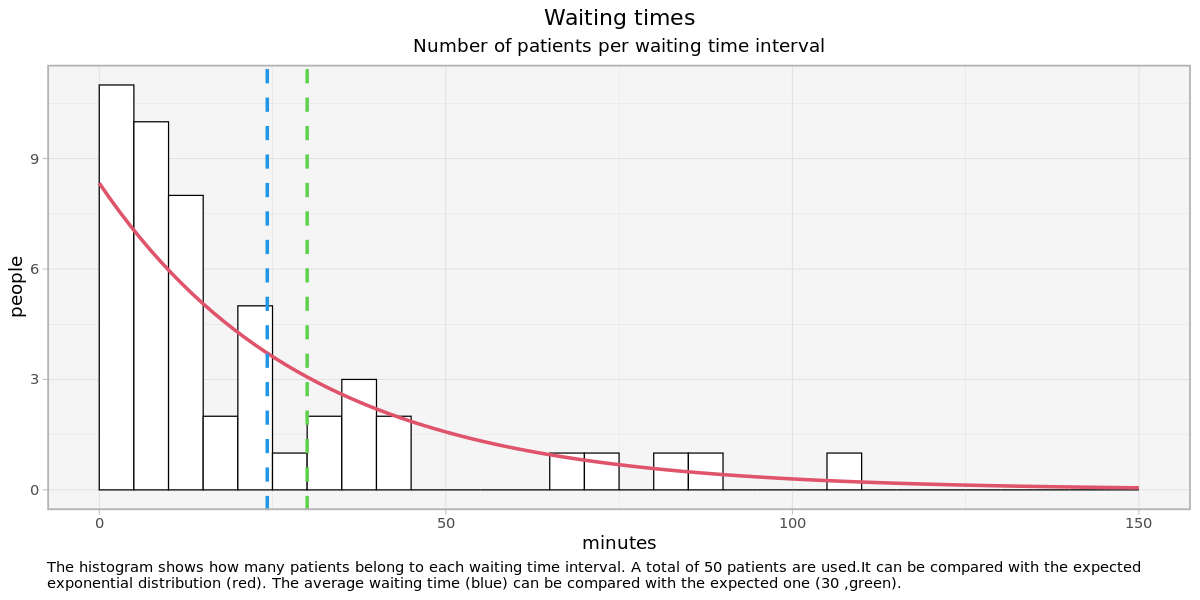

In [ ]:
# Define n=50 people waiting, rate=1/30 rate of the exponential distribution, 
n <- 50                   #number of people waiting
lamb <- 1/30              #exponential distribution rate
x <- rexp(n, lamb)        #simulation
distr_exp <- data.frame(x)
test <- function(x) {50*5*dexp(x, 1/30)}

fig(10,5)
patients_hist <- ggplot(distr_exp, aes(x = x)) + 
    geom_histogram(
        fill = "white",          #NB: only if not set before
        breaks = seq(0, 150, 5),
    #    bins = 15,
    #    binwidth = 5,
        alpha = 1,
        position = "identity",    #NB:"dodge" in case I want alpha=1 but I want to see what is behind
        colour = "black",        #NB: only if not set before
        lwd = 0.35,
    #    linetype = 1,
        ) +
    stat_function(
        fun = test,
        linetype = 1,
        color = 2,
        lwd = 1,
        ) +
    scale_x_continuous(
        breaks= seq(0, 150, 50),
        minor_breaks = seq(0, 150, 10),
        ) +
    theme_light(    # grey, gray, bw, linedraw, light, dark, minimal, classic, void, test
        base_size = 11,
        base_family = "",
        base_line_size = 0.5,
        base_rect_size = 1
        ) +

    theme(
    #    panel.grid.major.x = element_line(color = "red", size = 0.5, linetype = 2),    #NB: element_blank()
    #    panel.grid.major.y = element_line(color = "red", size = 0.5, linetype = 2),
    #    panel.grid.minor.x = element_line(color = 2, size = 0.25, linetype = 1),
    #    panel.grid.minor.y = element_line(color = 2, size = 0.25, linetype = 1),
    #    panel.grid = element_line(color = "#8ccde3", size = 0.75, linetype = 2)
        plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
    #    legend.position = c(0.2, 0.8),
    #    legend.background = legend.background = element_rect(fill = "lightblue", colour = 1),    #NB: choose the colors with color picker
    #    legend.title = element_text(family = "Roboto", color = "blue", size = 10, face = 2),
    #    legend.key.size = unit(1, units = "cm"),
    #    plot.margin = margin(t = 20, r = 50, b = 40, l = 10),
        panel.background = element_rect(fill = "#F5F5F5"),
    #    panel.border = element_rect(fill = "transparent", color = 4, size = 2),
    #    plot.background = element_rect(fill = "gray86"),
    #    plot.background = element_rect(color = "black", size = 2),
        plot.caption = element_text(hjust = 0),
    #    plot.tag.position = "bottomright",
        ) + 
    labs(
        title="Waiting times",
        subtitle = "Number of patients per waiting time interval",
        x = "minutes",
        y = "people",
    #    fill = "Title",
        caption = "The histogram shows how many patients belong to each waiting time interval. A total of 50 patients are used.It can be compared with the expected \nexponential distribution (red). The average waiting time (blue) can be compared with the expected one (30 ,green).",
    #    #tag = "Fig. 1",
    #    color = "Countries"
        ) +
    geom_vline(
        xintercept = mean(distr_exp$x),
        linetype = 2,
        color = 4,
        lwd = 1,
        ) +
    geom_vline(
        xintercept = 1/lamb,
        linetype = 2,
        color = 3,
        lwd = 1,
        ) +
    xlim(
        0, 150
        )
print(patients_hist)

#area <- n*h$breaks[2]       #area of the histogram = total number of counts n * binwitdh (h$breaks[2])

#lines(area*d_exp, lwd=2.5, lty="dashed", col="red")

##### 2.B)
The probability of waiting less than 10 minutes is calculated directly using the cdf pexp.

In [ ]:
prob_10_less <- pexp(10, rate=lamb)
cat(paste("Probability of waiting more than 10 minutes: ", sprintf(prob_10_less, fmt = '%.3f')))

Probability of waiting more than 10 minutes:  0.283

##### 2.C)
The theoretical mean value was known from the very beginning, 30=1/rate. \
If it is needed to extract an expected mean value using R-generated data, a possibility is to do a weighted mean of the first 10000 natural numbers using the dexp pdf (which are enough to reach a good level of precision). \
The experimental mean value is calculated with the mean of the distribution generated by rexp.


In [ ]:
avg_exp <- mean(distr_exp$x)
avg_R <- sum((0:10000)*dexp(0:10000, lamb))
avg_theory <- 1/lamb
cat(paste("Theoretical mean:", sprintf(avg_theory, fmt = '%.3f'),"\nR manipulation mean:", sprintf(avg_R, fmt = '%.3f'),"\nData mean:", sprintf(avg_exp, fmt = '%.3f')))

Theoretical mean: 30.000 
R manipulation mean: 29.997 
Data mean: 24.244

##### 2.D)
The probability of waiting more than 60 minutes is calculated doing the usual trick of 1 minus the probability of waiting less than 60 minutes. In this way the calculation is straightforward using the cdf pexp.

In [ ]:
prob_60_more <- 1 - pexp(60, rate=lamb)
cat(paste("Probability of waiting more than 1 hour: ", sprintf(prob_60_more, fmt = '%.3f')))

Probability of waiting more than 1 hour:  0.135

### Exercise 3
    • Let’s suppose that on a book, on average, there is one typo error every three pages. If the number of errors follows a Poisson distribution, plot the pdf and cdf, and calculate the probability that there is at least one error on a specific page of the book.

The calculation is similar to the one done in the previous exercise: taking advantage of the possibility of using the cdf to calculate the probability of having 0 typos, and then  getting the probability of at least one typo by subtracting the 0-typos probability to 1.
This time, since the plots have less relevant features, the plots are done with the standard plot function.

P(errors>=1| lambda ) =  0.283

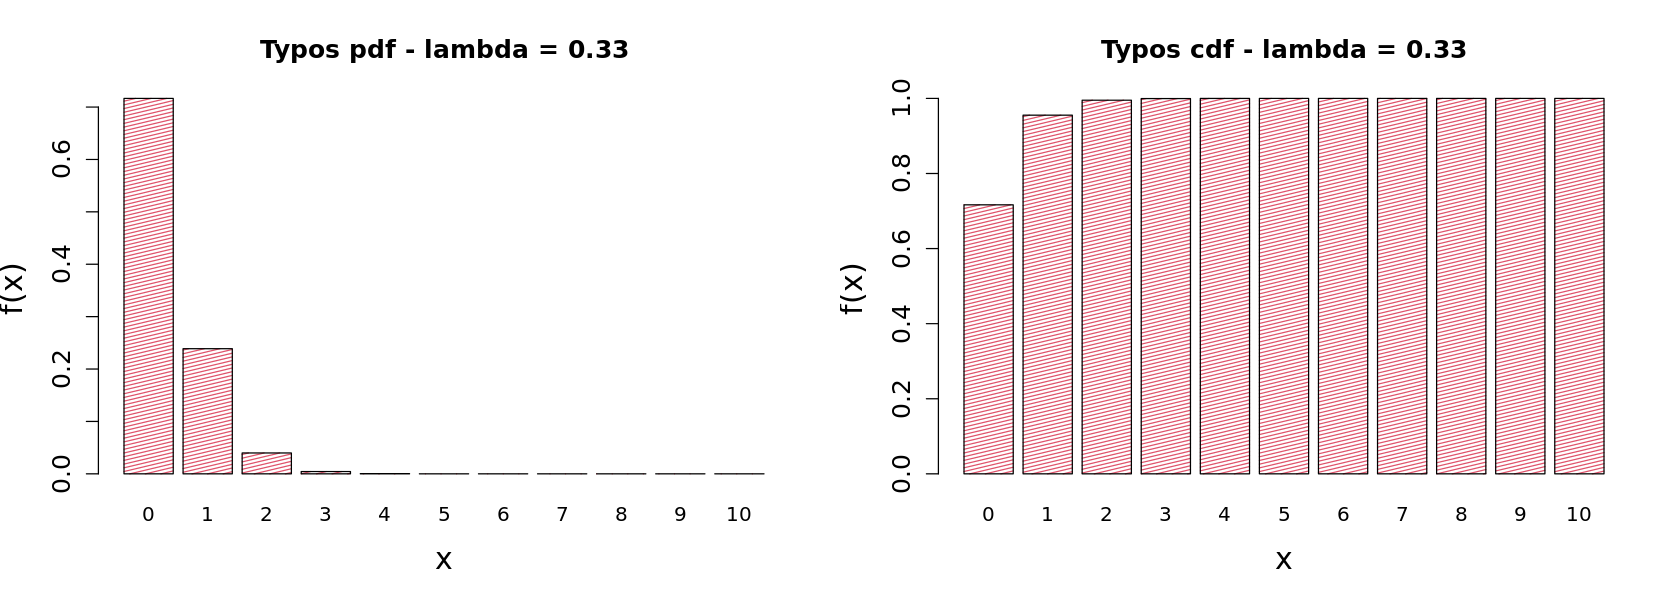

In [ ]:
lambda <- 1/3
##P(>=1|lambda) = 0.632
x <- 0:10
pdf <- dpois(x, lambda )
cdf <- ppois(x, lambda )

fig(14, 5)
par(mfrow=c(1,2))

barplot(pdf ,names=x, col=2, xlab="x", ylab="f(x)", density=30, main = sprintf ("Typos pdf - lambda = %.2f",lambda ), cex.lab=1.5, cex.axis=1.25, cex.main=1.25, cex.sub=1.5)
barplot(cdf ,names=x, col=2, xlab="x", ylab="f(x)", density=30, main = sprintf ("Typos cdf - lambda = %.2f",lambda ),  cex.lab=1.5, cex.axis=1.25, cex.main=1.25, cex.sub=1.5)

cat( paste(c("P(errors>=1| lambda ) = ", sprintf(1 - pdf[1], fmt = '%.3f'))))

### Exercise 4
    • We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed.

The calculation is similar to the one done in the previous exercise: taking advantage of the possibility of using the cdf to calculate the probability of having up to 9 non aces cards, and then  getting the probability of at-least-9-non-aces-cards by subtracting the up-to-8-non-aces-cards probability from 1.

In [ ]:
p_cards <- 1-pgeom(8, 4/52)
cat("Probability that at least 10 draws are needed:", paste(sprintf(p_cards, fmt = '%.3f')))


Probability that at least 10 draws are needed: 0.487

### Exercise 5
    • The time it takes a student to complete a TOLC-I University orientation and evaluation test follows the density function given.
    a) Using the integrate() R function, determine the constant c (and verify it analytically)
    b) Write the set of four R functions and plot the pdf and cdf, respectively
    c) Evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take 90 and 120 minutes.

##### 5.A)
Integrating the pdf on its support, and then imposing the value of the integral to be equal 1, c is determined to be 6.

In [ ]:
f <- function(t){
    y <- ifelse ( (t<2 & t>1),
                  (t-1)*(2-t),
                  0)    
    return(y)
}

area <- integrate(f, 1, 2)

c <- 1/area$value

cat("c =", c)

c = 6

##### 5.B)
The pdf and the cdf are computed using their definition (the second can be calculated both analitically and using the integrate function of R). To calculate the quantile function the uniroot function is used, to calculate the rf distribution the inverse transform method, using the qf, is exploited. Then pdf and cdf are plotted with the standard plot function.

In [ ]:
pdf <- function(t){
    y <- ifelse ( (t<2 & t>1),
                  c*(t-1)*(2-t),
                  0   
                )
    return(y)
}
pdf <- Vectorize(pdf)

cdf <- function(t){
    y <- ifelse ( (t<2 & t>1),
                   integrate(pdf, 1, t)$value,
                 ifelse ( (t>=2),
                           1,
                           0)
                 )
    return(y)
} 
cdf <- Vectorize(cdf)

cdf2 <- function(t){
    y <- ifelse ( (t<2 & t>1),
                   9*t^2 - 2*t^3 - 12*t + 5,
                 ifelse ( (t>=2),
                           1,
                           0)
                 )
    return(y)
} 

inv <- function (f){
   function (y){
     uniroot(function(x){f(x)-y}, lower = 1, upper = 2)$root 
   } 
}

rf <- function(n){
    u <- runif(n)
    return(qf(u))
}

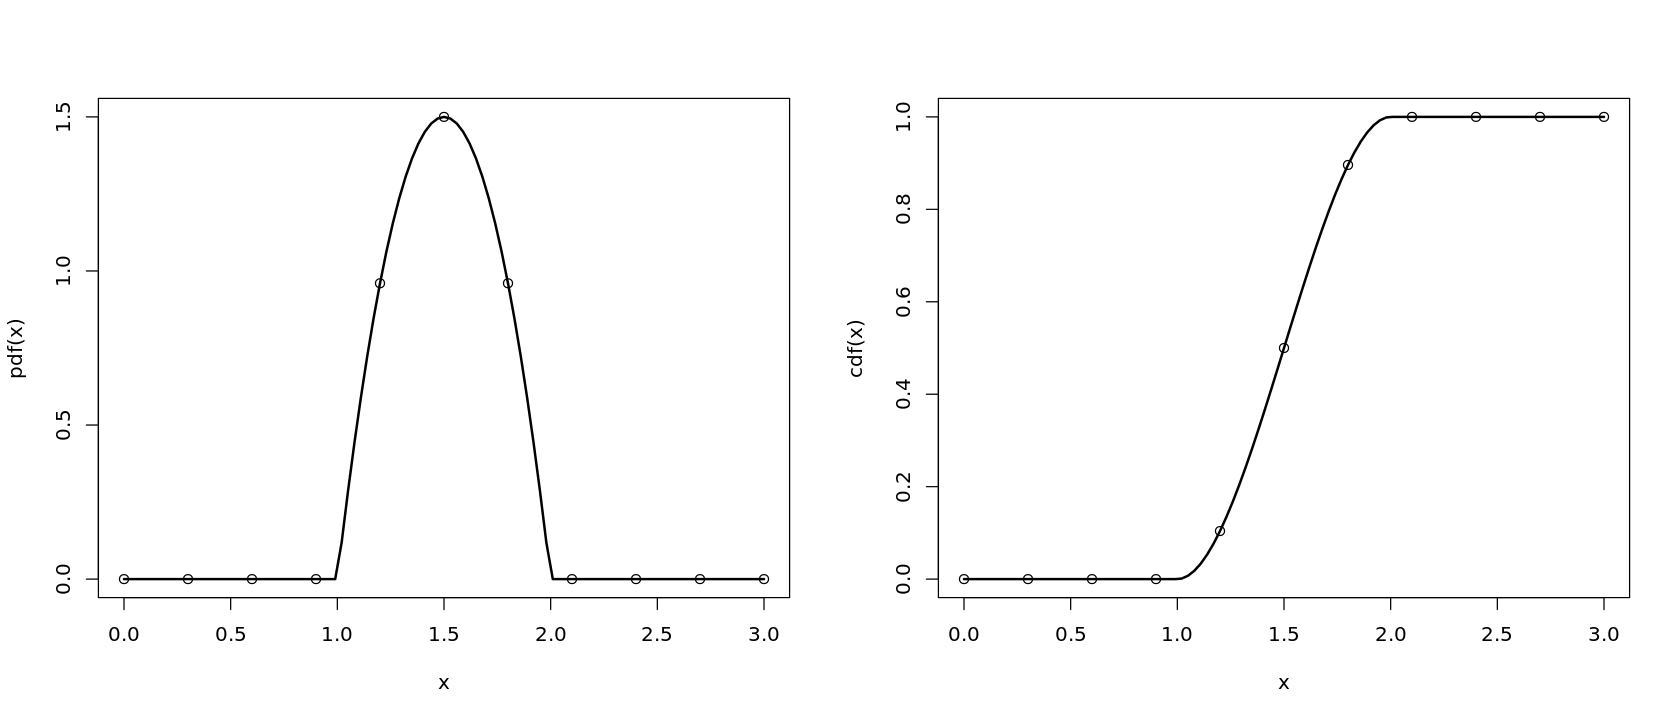

In [ ]:
x = seq(0,3, length.out=11)
fig(14,6)
par(mfrow=c(1,2))
plot(x, pdf(x), xlab='x', ylab='pdf(x)')
curve(pdf(x), lwd=2, col = 1, lty = 1, add=TRUE)

plot(x, cdf(x), xlab='x', ylab='cdf(x)')
curve(cdf(x), lwd=2, col = 1, lty = 1, add=TRUE)

##### 5.C)
Probability of more than 75 minutes = 1 - probability of less than 75 minutes.\
Probability of 90 to 120 minutes = probability of less than 120 minutes - probability of less than 90 minutes = 1 - probability of less than 90 minutes.

In [ ]:
p_75 <- integrate(pdf, 75/60, 2)
p_90_120 <- integrate(pdf, 1.5, 2)

p_75more <- 1 - cdf(75/60)
p_90_120 <- cdf(2)- cdf(1.5)

cat(paste("Probability of more than 75 minutes:", sprintf(p_75more, fmt = '%.3f'), "\nProbability of 90 to 120 minutes:", sprintf(p_90_120, fmt = '%.3f')))

Probability of more than 75 minutes: 0.844 
Probability of 90 to 120 minutes: 0.500

### Exercise 6
    • Given the function determining the lifetime of car tires:
    a) Write the set of four R functions and plot the pdf and cdf, respectively.
    b) Determine the probability that tires will last less than 15000 km.
    c) Sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression Var(X) = E[X^2] − E[X]^2.

##### 6.A)
The pdf and the cdf are computed using their definition (the second can be calculated both analitically and using the integrate function of R). The quantile function is easy to calculate analitically, the rf distribution is calculated with the inverse transform method, using the qf. Then pdf and cdf are plotted with the standard plot function.

In [ ]:
pdf <- function(x){
    y <- ifelse ( (x<=2 & x>=1),
                   2/(x^2),
                   0)
    return(y)
}
pdf <- Vectorize(pdf)

cdf <- function(x){
    y <- ifelse ( (x<=2 & x>=1),
                   integrate(pdf, 1, x)$value,
                 ifelse ( (x>2),
                           1,
                           0)
                 )
    return(y)
} 
cdf <- Vectorize(cdf)

qf <- function(p) {
    return(ifelse(0 < p & p < 1, 2 / (2 - p), NA))
}

rf <- function(n) {
    u <- runif(n)
    return(qf(u))
}

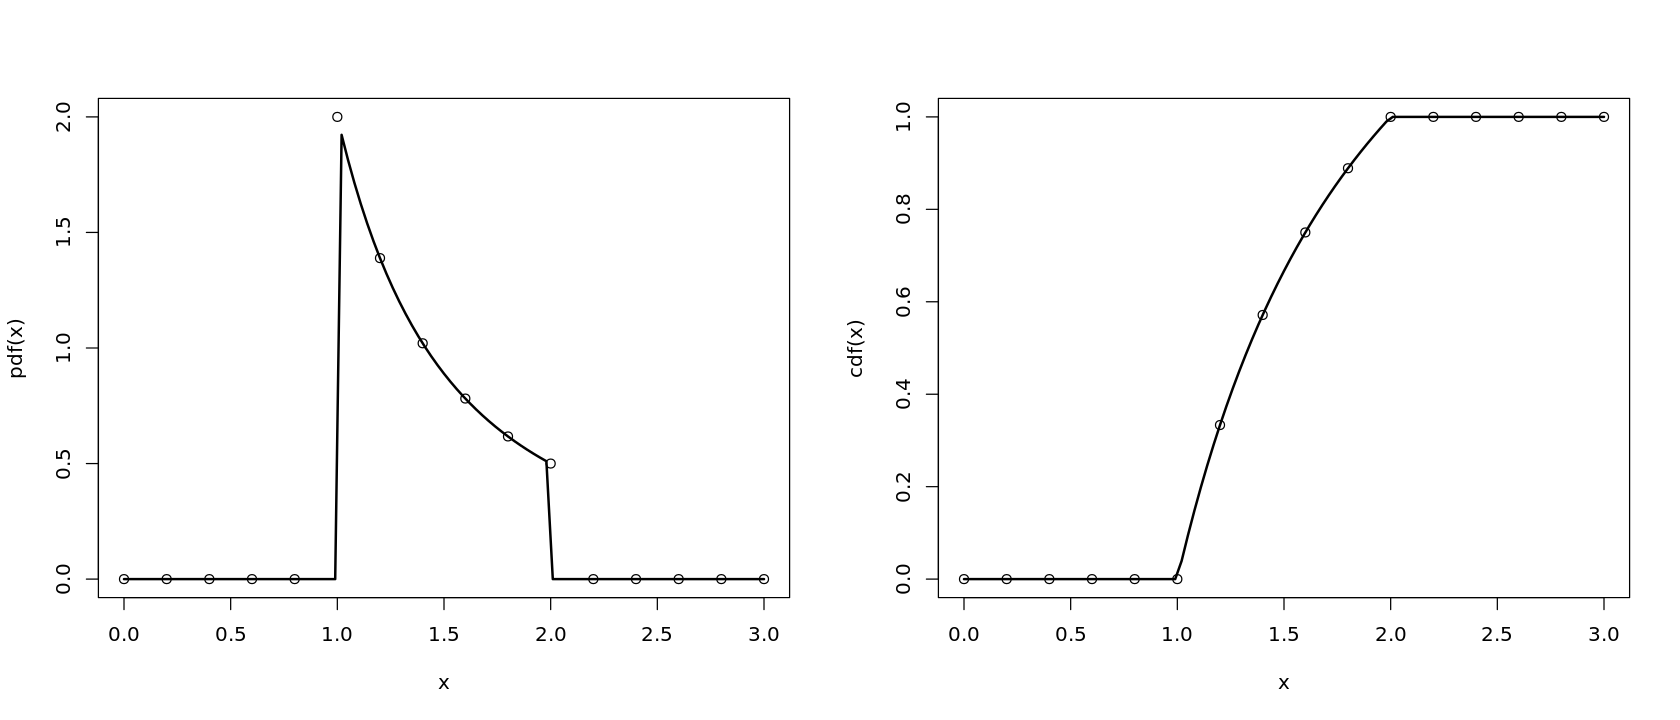

In [ ]:
x = seq(0,3, length.out=16)
fig(14,6)
par(mfrow=c(1,2))
plot(x, pdf(x), xlab='x', ylab='pdf(x)')
curve(pdf(x), lwd=2, col = 1, lty = 1, add=TRUE)

plot(x, cdf(x), xlab='x', ylab='cdf(x)')
curve(cdf(x), lwd=2, col = 1, lty = 1, add=TRUE)

##### 6.B)
The probability of tire lifetime shorter than 15000 km is computed using the cdf of the x, simply as cdf(1.5).

In [ ]:
prob_15kless <- cdf(1.5)
cat(paste("Probability of tire lifetime shorter than 15000 km : ", sprintf(prob_15kless, fmt = '%.3f')))

Probability of tire lifetime shorter than 15000 km :  0.667

##### 7.B)
Once the samples are created using the rf, the mean and the variance are got by applying the definition.

In [ ]:
distr <- rf(3000)

mean_1 <- mean(distr)
mean_2 <- mean(distr^2)

var <- mean_2 - mean_1^2

cat(paste("Mean:", sprintf(mean_1, fmt = '%.2f'), "\nVariance", sprintf(var, fmt = '%.2f')))


Mean: 1.39 
Variance 0.08

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a9c3524-e816-4375-bb38-af9f3980afee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>